In [1]:
directory = r"Z:\QSimMeasurements\Measurements\\8QV1_Triangle_Lattice\\qubit_parameters\\Dictionary_File\\"

In [2]:
from Import_Functions_Transmon import *
import matplotlib.pyplot as plt

In [3]:
import os
import pickle

files = os.listdir(directory)
sorted_files = sorted(files)
file_name = sorted_files[-1]  # most recent
print(sorted_files)
dictionary_everything = read_info(directory + file_name)

['20250615_222820_8Q_Parameters.pkl', '20250615_223056_8Q_Parameters.pkl', '20250615_223355_8Q_Parameters.pkl', '20250615_224022_8Q_Parameters.pkl', '20250618_155340_8Q_Parameters.pkl', '20250618_155819_8Q_Parameters.pkl', '20250618_160739_8Q_Parameters.pkl', '20250618_161154_8Q_Parameters.pkl', '20250618_161530_8Q_Parameters.pkl', '20250618_161813_8Q_Parameters.pkl', '20250618_162313_8Q_Parameters.pkl', '20250623_103107_8Q_Parameters.pkl', '20250707_091839_8Q_Parameters.pkl', '20250708_092050_8Q_Parameters.pkl', '20250709_081618_8Q_Parameters.pkl', '20250709_090332_8Q_Parameters.pkl', '20250709_155545_8Q_Parameters.pkl', '20250709_161515_8Q_Parameters.pkl', '20250716_100920_8Q_Parameters.pkl', '20250723_222831_8Q_Parameters.pkl']


In [10]:
dictionary_everything['crosstalk_offset']

array([ 0.08650627,  0.00421169,  0.18661097, -0.17419282,  0.19496159,
       -0.08645642,  0.14282769,  0.02080892, -0.1651734 , -0.19976995,
       -0.2343911 , -0.21902371, -0.22059211, -0.06487993])

In [ ]:

dictionary_everything

{'Q1': array([0.08774992, 4.44294982, 2.31088279, 0.04348395, 0.64285525]),
 'Q2': array([ 0.06522968,  4.41653009,  2.47157458,  0.00853351, -0.63513068]),
 'Q3': array([0.04490064, 4.36638646, 2.33412906, 0.        , 0.62896545]),
 'Q4': array([0.07077662, 4.5248054 , 2.5653183 , 0.1       , 0.63417076]),
 'Q5': array([0.03938833, 4.47996591, 2.30936685, 0.1       , 0.64701083]),
 'Q6': array([0.06293122, 4.46724348, 2.54000876, 0.1       , 0.65220108]),
 'Q7': array([-0.00852437,  4.35314014,  2.34998833,  0.0378556 ,  0.63905277]),
 'Q8': array([0.03661994, 4.40577597, 2.46466838, 0.        , 0.63326908]),
 'C1': array([-0.15874381,  5.92904762,  3.02780768,  0.07811505, -0.07250567]),
 'C2': array([-0.18387826,  6.55562755,  3.03517545,  0.49989549,  0.13573256]),
 'C3': array([-0.22583344,  5.74450281,  2.9869383 , -0.03791348, -0.0193125 ]),
 'C4': array([-0.20411855,  5.72481491,  3.0737693 , -0.08225332,  0.0408963 ]),
 'C5': array([-0.18124988,  7.24393748,  2.93383916,  1.10

In [24]:
BETAS = np.load(rf"{qubit_params_dir}/betas.npy")
BETAS
dictionary_everything['betas'] = BETAS

In [22]:
for q in [Q1_MHz_bare,
Q2_MHz_bare,
Q3_MHz_bare,
Q4_MHz_bare,
Q5_MHz_bare,
Q6_MHz_bare,
Q7_MHz_bare,
Q8_MHz_bare]:
    q.transmon_popt[1] /= 1e3
    q.transmon_popt[3] /= 1e3
    print(q.transmon_popt)
    dictionary_everything[q.name] = q.transmon_popt
dictionary_everything

[ 2.68916853e+04  4.32954883e+00  1.07491783e+05 -7.96878970e-02
  6.32807142e-01]
[2.89438623e+04 4.49983630e+00 1.16002485e+05 8.13733091e-02
 6.39111987e-01]
[2.58003016e+04 4.53136552e+00 1.01566623e+05 1.53193189e-01
 6.40562098e-01]
[ 2.73023341e+04  4.38859696e+00  1.10240171e+05 -4.54460093e-02
  6.25898293e-01]
[2.58951519e+04 4.73551348e+00 1.02801115e+05 3.33056925e-01
 6.59503837e-01]
[2.77817842e+04 4.47525681e+00 1.12241568e+05 9.46846681e-02
 6.49852554e-01]
[2.61531746e+04 4.38735484e+00 1.02889909e+05 6.25900691e-02
 6.40205372e-01]
[2.51434433e+04 4.48370290e+00 9.75819563e+04 6.61387751e-02
 6.36909538e-01]


{'Q1': array([0.08774992, 4.44294982, 2.31088279, 0.04348395, 0.64285525]),
 'Q2': array([ 0.06522968,  4.41653009,  2.47157458,  0.00853351, -0.63513068]),
 'Q3': array([0.04490064, 4.36638646, 2.33412906, 0.        , 0.62896545]),
 'Q4': array([0.07077662, 4.5248054 , 2.5653183 , 0.1       , 0.63417076]),
 'Q5': array([0.03938833, 4.47996591, 2.30936685, 0.1       , 0.64701083]),
 'Q6': array([0.06293122, 4.46724348, 2.54000876, 0.1       , 0.65220108]),
 'Q7': array([-0.00852437,  4.35314014,  2.34998833,  0.0378556 ,  0.63905277]),
 'Q8': array([0.03661994, 4.40577597, 2.46466838, 0.        , 0.63326908]),
 'C1': array([-1.99161817e-01,  5.95749245e+00,  3.02590748e+00,  5.93500174e-02,
        -1.58104419e-03]),
 'C2': array([-1.73965380e-01,  5.95646508e+00,  3.03778173e+00,  1.60725177e-02,
         3.44879775e-03]),
 'C3': array([-2.17901156e-01,  5.96127832e+00,  2.98841896e+00,  9.53633490e-02,
        -1.13577030e-03]),
 'C4': array([-0.22975403,  5.97344604,  3.0742997 ,  0

In [33]:
# for Q in All_transmons:
#     dictionary_everything[Q.name] = Q.transmon_popt

dictionary_everything['crosstalk_matrix'] = crosstalk_matrix
dictionary_everything['crosstalk_offset'] = crosstalk_offset
dictionary_everything['crosstalk_inverse'] = crosstalk_inverse

In [25]:
print(directory + file_name)
total_path = directory + file_name_('8Q_Parameters')

print('New File!!!!')
print(total_path)
save_info(dictionary_everything, total_path)

Z:\QSimMeasurements\Measurements\\8QV1_Triangle_Lattice\\qubit_parameters\\Dictionary_File\\20250723_222831_8Q_Parameters.pkl
New File!!!!
Z:\QSimMeasurements\Measurements\\8QV1_Triangle_Lattice\\qubit_parameters\\Dictionary_File\\20250725_114303_8Q_Parameters.pkl


In [21]:
Q1_MHz_bare = Transmon(np.load(fr'{qubit_params_dir}\bare_Q1_FFgain_MHz.npy'), 'Q1_bare')
Q2_MHz_bare = Transmon(np.load(fr'{qubit_params_dir}\bare_Q2_FFgain_MHz.npy'), 'Q2_bare')
Q3_MHz_bare = Transmon(np.load(fr'{qubit_params_dir}\bare_Q3_FFgain_MHz.npy'), 'Q3_bare')
Q4_MHz_bare = Transmon(np.load(fr'{qubit_params_dir}\bare_Q4_FFgain_MHz.npy'), 'Q4_bare')
Q5_MHz_bare = Transmon(np.load(fr'{qubit_params_dir}\bare_Q5_FFgain_MHz.npy'), 'Q5_bare')
Q6_MHz_bare = Transmon(np.load(fr'{qubit_params_dir}\bare_Q6_FFgain_MHz.npy'), 'Q6_bare')
Q7_MHz_bare = Transmon(np.load(fr'{qubit_params_dir}\bare_Q7_FFgain_MHz.npy'), 'Q7_bare')
Q8_MHz_bare = Transmon(np.load(fr'{qubit_params_dir}\bare_Q8_FFgain_MHz.npy'), 'Q8_bare')

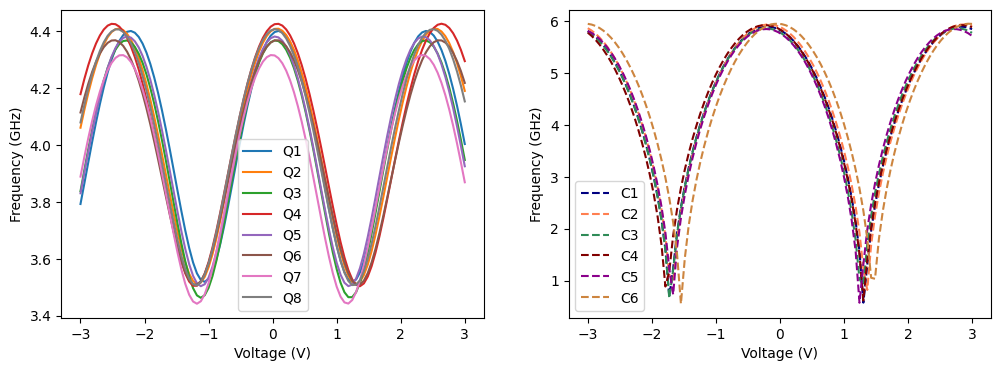

In [7]:
qubit_params_dir = r'Z:\QSimMeasurements\Measurements\8QV1_Triangle_Lattice\qubit_parameters'
Q1 = Transmon(np.load(fr'{qubit_params_dir}\old_Q1_popt.npy'), 'Q1')
Q2 = Transmon(np.load(fr'{qubit_params_dir}\old_Q2_popt.npy'), 'Q2')
Q3 = Transmon(np.load(fr'{qubit_params_dir}\old_Q3_popt.npy'), 'Q3')
Q4 = Transmon(np.load(fr'{qubit_params_dir}\old_Q4_popt.npy'), 'Q4')
Q5 = Transmon(np.load(fr'{qubit_params_dir}\old_Q5_popt.npy'), 'Q5')
Q6 = Transmon(np.load(fr'{qubit_params_dir}\old_Q6_popt.npy'), 'Q6')
Q7 = Transmon(np.load(fr'{qubit_params_dir}\old_Q7_popt.npy'), 'Q7')
Q8 = Transmon(np.load(fr'{qubit_params_dir}\old_Q8_popt.npy'), 'Q8')

C1 = Transmon(np.load(fr'{qubit_params_dir}\C1_popt.npy'), 'C1')
C2 = Transmon(np.load(fr'{qubit_params_dir}\C2_popt.npy'), 'C2')
C3 = Transmon(np.load(fr'{qubit_params_dir}\C3_popt.npy'), 'C3')
C4 = Transmon(np.load(fr'{qubit_params_dir}\C4_popt.npy'), 'C4')
C5 = Transmon(np.load(fr'{qubit_params_dir}\C5_popt.npy'), 'C5')
C6 = Transmon(np.load(fr'{qubit_params_dir}\C6_popt.npy'), 'C6')

All_qubits = [Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8]
All_couplers = [C1, C2, C3, C4, C5, C6]
All_transmons = All_qubits + All_couplers

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

Vs = np.linspace(-3, 3, 100)
for Q in All_qubits:
    ax1.plot(Vs, transmon_fit(Vs, *Q.transmon_popt), label=Q.name)
ax1.set_xlabel("Voltage (V)")
ax1.set_ylabel("Frequency (GHz)")
ax1.legend()

for Q, color in zip(All_couplers, ['navy', 'coral', 'seagreen', 'maroon', 'darkmagenta', 'peru']):
    ax2.plot(Vs, transmon_fit(Vs, *Q.transmon_popt), label=Q.name, ls='--', color=color)
ax2.set_xlabel("Voltage (V)")
ax2.set_ylabel("Frequency (GHz)")
ax2.legend()

plt.show()

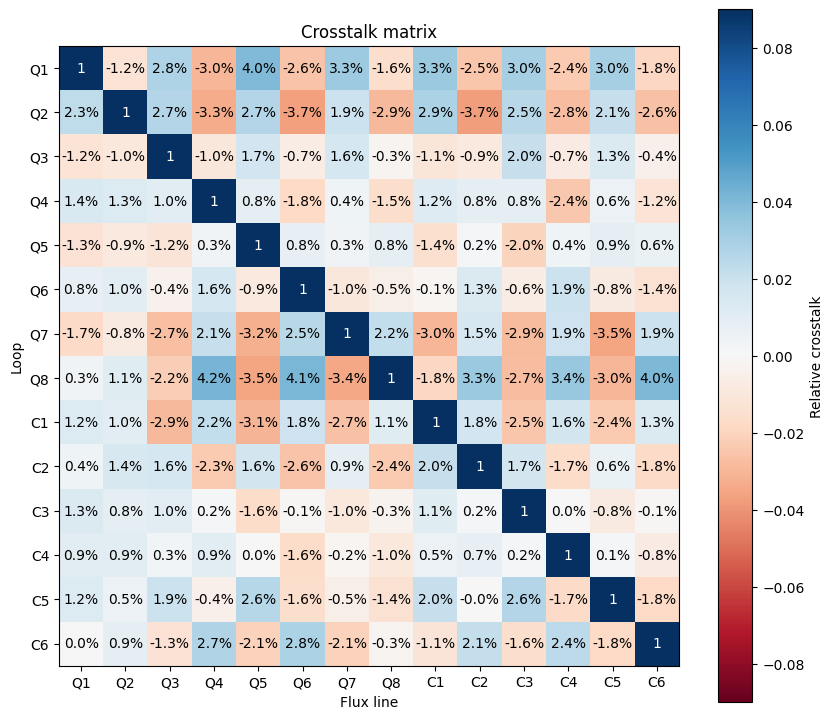

In [32]:
iteration = 5
crosstalk_directory= r'Z:\QSimMeasurements\Measurements\8QV1_Triangle_Lattice\crosstalk'
crosstalk_matrix = np.genfromtxt(fr'{crosstalk_directory}\crosstalk_matrix_{iteration}.csv', delimiter=',')
crosstalk_offset = np.genfromtxt(fr'{crosstalk_directory}\offsets_{iteration}.csv', delimiter=',')
try:
    crosstalk_inverse = np.genfromtxt(fr'{crosstalk_directory}\inverse_matrix{iteration}.csv', delimiter=',')
except FileNotFoundError:
    crosstalk_inverse = np.linalg.inv(crosstalk_matrix)


def flux_to_voltage(flux_vector):
    return crosstalk_inverse @ (flux_vector + crosstalk_offset * np.diag(crosstalk_matrix) )
    
def voltage_to_flux(voltage_vector):
    return crosstalk_matrix @ voltage_vector - crosstalk_offset * np.diag(crosstalk_matrix)

def show_percent_matrix(ct_mat):
    percent_matrix = ct_mat.copy()
    for i, Q in enumerate(All_transmons):
        percent_matrix[i] = percent_matrix[i] * Q.flux_quantum_voltage
    
    fig, ax = plt.subplots(figsize=(10,9))
    im= ax.imshow(percent_matrix, cmap='RdBu', vmin=-0.09, vmax=0.09)
    fig.colorbar(im, label=r"Relative crosstalk", ax=ax)
    for (j,i),label in np.ndenumerate(percent_matrix):
        plt.text(i,j,f"{np.round(label*100,1)}%" if i != j else 1,ha='center',va='center', color='black' if i!=j else 'white')
    plt.xticks(range(len(All_transmons)), [Q.name for Q in All_transmons])
    plt.yticks(range(len(All_transmons)), [Q.name for Q in All_transmons])
    plt.ylabel("Loop")
    plt.xlabel("Flux line")
    plt.title("Crosstalk matrix")
    plt.show()

show_percent_matrix(crosstalk_matrix)

In [35]:
class Resonator():
    def __init__(self, coupled_Qubit, popt):
        self.coupled_Q = coupled_Qubit
        self.β, self.Ω = popt            

    def freq(self, flux):
        '''Qubit flux to Resonator frequency'''
        qubit_freq = self.coupled_Q.freq(flux)
        resonator_freq = self.Ω
        g = self.β * np.sqrt(qubit_freq * resonator_freq)
        Δ = qubit_freq - resonator_freq
        return resonator_freq - g**2 / Δ

qubit_params_dir = r'Z:\QSimMeasurements\Measurements\8QV1_Triangle_Lattice\qubit_parameters'
R1 = Resonator(Q1, np.load(fr'{qubit_params_dir}\R1_popt.npy'))
R2 = Resonator(Q2, np.load(fr'{qubit_params_dir}\R2_popt.npy'))
R3 = Resonator(Q3, np.load(fr'{qubit_params_dir}\R3_popt.npy'))
R4 = Resonator(Q4, np.load(fr'{qubit_params_dir}\R4_popt.npy'))
R5 = Resonator(Q5, np.load(fr'{qubit_params_dir}\R5_popt.npy'))
R6 = Resonator(Q6, np.load(fr'{qubit_params_dir}\R6_popt.npy'))
R7 = Resonator(Q7, np.load(fr'{qubit_params_dir}\R7_popt.npy'))
R8 = Resonator(Q8, np.load(fr'{qubit_params_dir}\R8_popt.npy'))

All_resonators = [R1, R2, R3, R4, R5, R6, R7, R8]

def voltages_to_resonators(voltages):
    fluxes = voltage_to_flux(voltages)
    return [R.freq(flux) for R, flux in zip(All_resonators, fluxes)]

voltages_to_resonators([np.float32(-1.051), np.float64(-0.8461), np.float64(-0.6212), np.float64(-0.5251), np.float64(-1.1352), np.float64(-1.1923), np.float64(-1.1785), np.float64(-1.1936), np.float64(-0.1852), np.float64(-0.2132), np.float64(-0.2413), np.float64(-0.2256), np.float64(-0.2009), np.float64(-0.0939)]
)

[np.float64(7.122008254918465),
 np.float64(7.077329047760153),
 np.float64(7.511069973829845),
 np.float64(7.568606145283701),
 np.float64(7.3628148614916284),
 np.float64(7.440745559370861),
 np.float64(7.2536650593064325),
 np.float64(7.308817859619348)]